# MNIST Exploratory Data Analysis (EDA)

In this notebook, we explore the MNIST data set to gain a better understanding of it.

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Define constants

In [2]:
IMAGE_SIZE = (28, 28)

## Load data

We load both the train set and test set as Pandas data frames.

In [3]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

train_features = train_data.drop('label', axis=1)
train_label = train_data['label']

### Train data set

In [4]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Test data set

In [6]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## Check for missing values

There are no missing values for either the train or test set.

In [8]:
train_data.isna().sum().sum()

0

In [9]:
test_data.isna().sum().sum()

0

## Check for categorical variables

There are no categorical variables in our data set.

In [10]:
train_data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [11]:
test_data.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object

## Plot label distribution

From our label distribution, we see that our data set is balanced since the labels share similar frequencies.

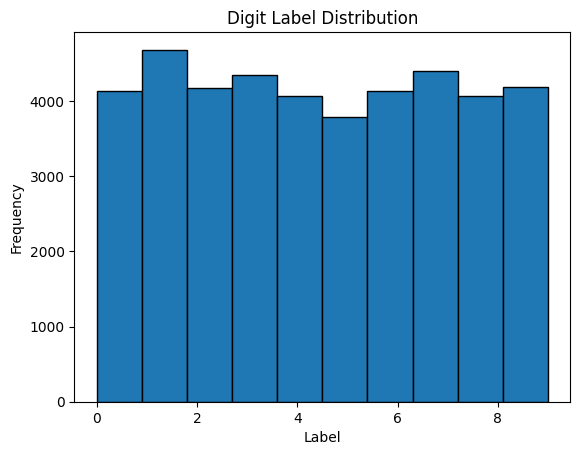

In [12]:
plt.hist(train_label, edgecolor = 'black')
plt.title('Digit Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

## Plot examples

### Example image from train set

In [13]:
def plot_train_example(idx):
    example = train_features.loc[idx,:]
    example = np.array(example)
    example = np.reshape(example, IMAGE_SIZE)
    example_plot = plt.imshow(example, plt.cm.gray)
    plt.colorbar()

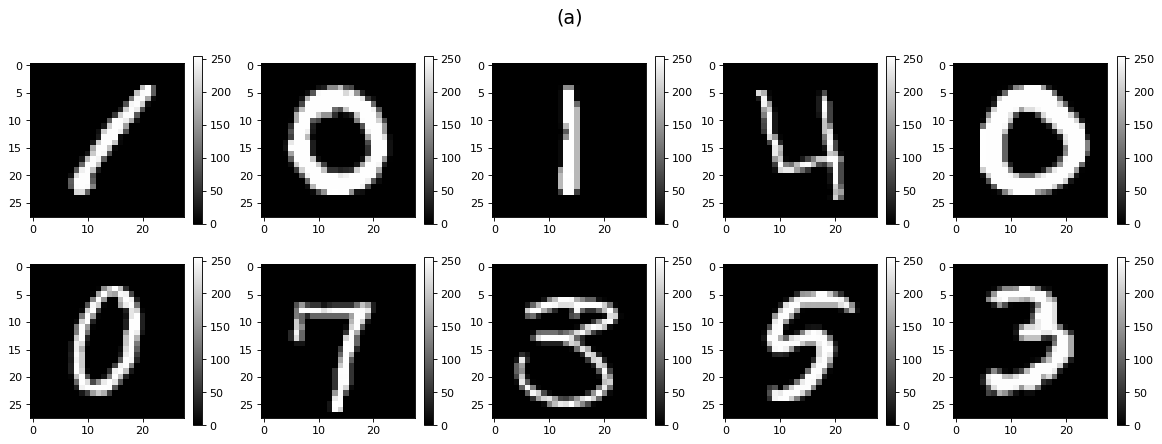

In [14]:
fig = plt.figure(figsize=(18, 6), dpi=80)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plot_train_example(i)

fig.suptitle('(a)', fontsize='xx-large')
plt.savefig('train_sample.png', dpi=fig.dpi)
plt.show()

## Example image from test set

In [15]:
def plot_test_example(idx):
    example = test_data.loc[idx,:]
    example = np.array(example)
    example = np.reshape(example, IMAGE_SIZE)
    example_plot = plt.imshow(example, plt.cm.gray)
    plt.colorbar()

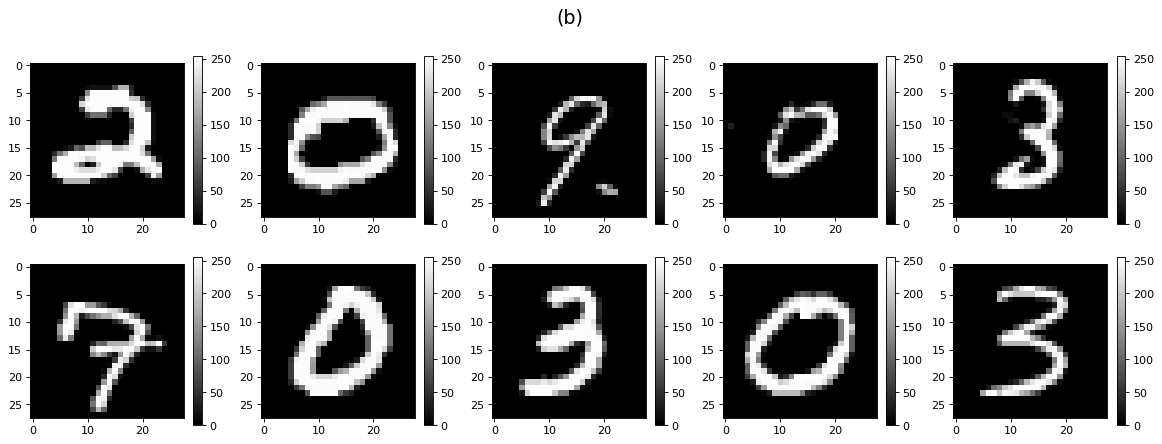

In [16]:
fig = plt.figure(figsize=(18, 6), dpi=80)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plot_test_example(i)

fig.suptitle('(b)', fontsize='xx-large')
plt.savefig('test_sample.png', dpi=fig.dpi)
plt.show()

## Plot Pixel Value Histogram

From the histogram, we see that the images mostly consist of 0s (long tail distribution).

In [17]:
def pixel_hist(arr, title, filename):
    fig = plt.figure()
    plt.hist(arr, log=True, bins=255)
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.savefig(filename, dpi=fig.dpi)
    plt.show()

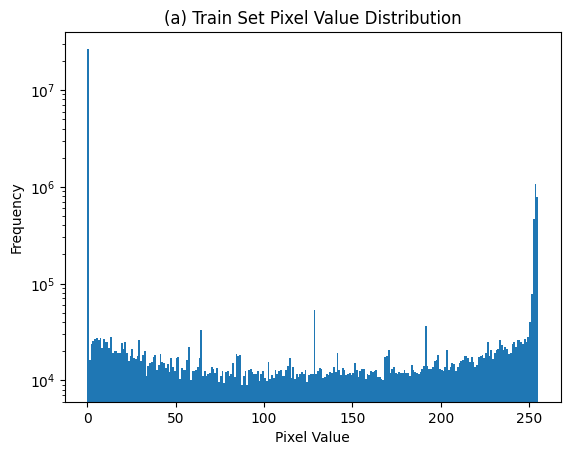

In [18]:
pixel_hist(arr=train_features.values.flatten(),
          title="(a) Train Set Pixel Value Distribution",
          filename="pixel-distribution-train.png")

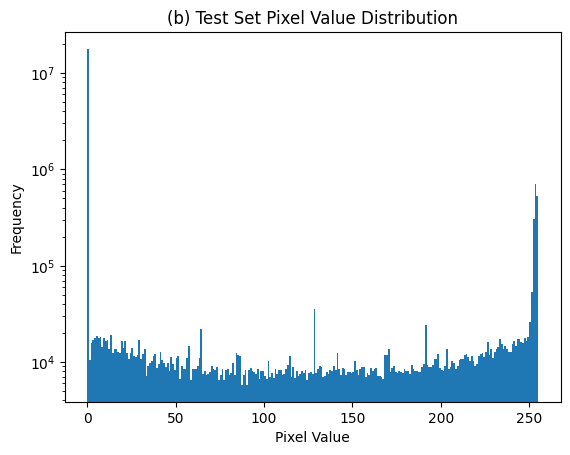

In [19]:
pixel_hist(arr=test_data.values.flatten(),
           title="(b) Test Set Pixel Value Distribution",
           filename="pixel-distribution-test.png")

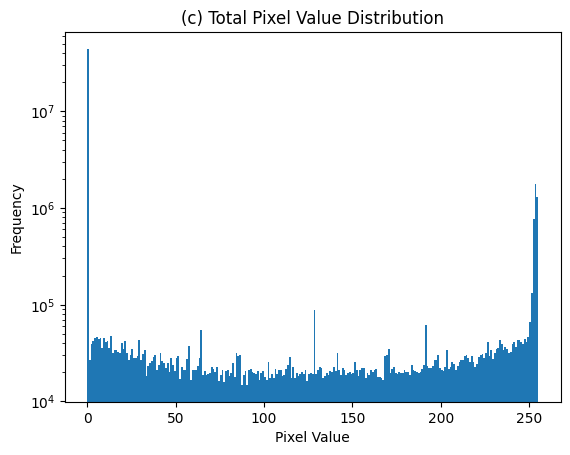

In [20]:
pixel_hist(arr=np.concatenate((train_features.values.flatten(), test_data.values.flatten())),
           title="(c) Total Pixel Value Distribution",
           filename="pixel-distribution-total.png")

## Center features

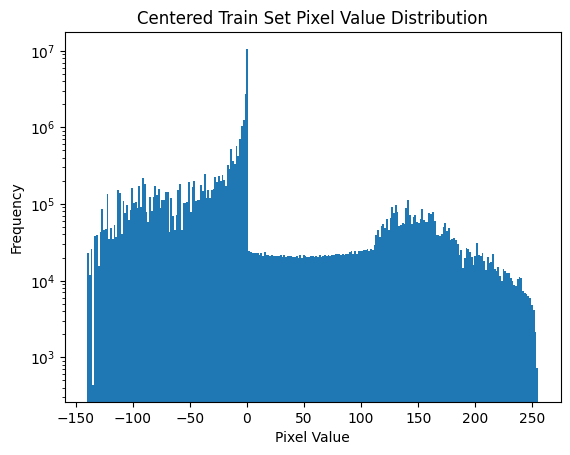

In [21]:
train_features_centered = train_features - np.mean(train_features, axis=0)
pixel_hist(arr=train_features_centered.values.flatten(),
           title="Centered Train Set Pixel Value Distribution",
           filename="pixel-distribution-train-centered.png")

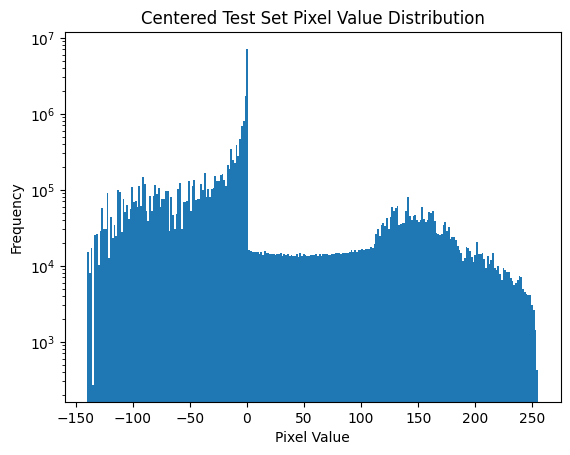

In [22]:
test_data_centered = test_data - np.mean(train_features, axis=0)
pixel_hist(arr=test_data_centered.values.flatten(),
           title="Centered Test Set Pixel Value Distribution",
           filename="pixel-distribution-test-centered.png")

## Apply PCA

In [23]:
pca = PCA(n_components=2)

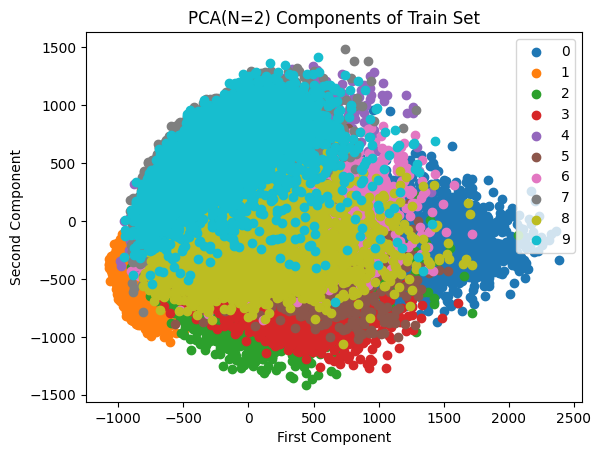

In [24]:
train_features_reduced = pca.fit(train_features_centered).transform(train_features_centered)


fig = plt.figure()
for i in range(0,10):
    plt.scatter(train_features_reduced[train_label == i, 0], train_features_reduced[train_label == i, 1], label=i)

plt.title('PCA(N=2) Components of Train Set')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.savefig('train-pca.png', dpi=fig.dpi)
plt.show()